In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import plotly.express as px
#scoring and tuning 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xg

In [291]:
df=pd.read_csv(r'C:\Users\vedan\Desktop\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [292]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [293]:
df.shape

(301, 9)

In [294]:
df.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [295]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

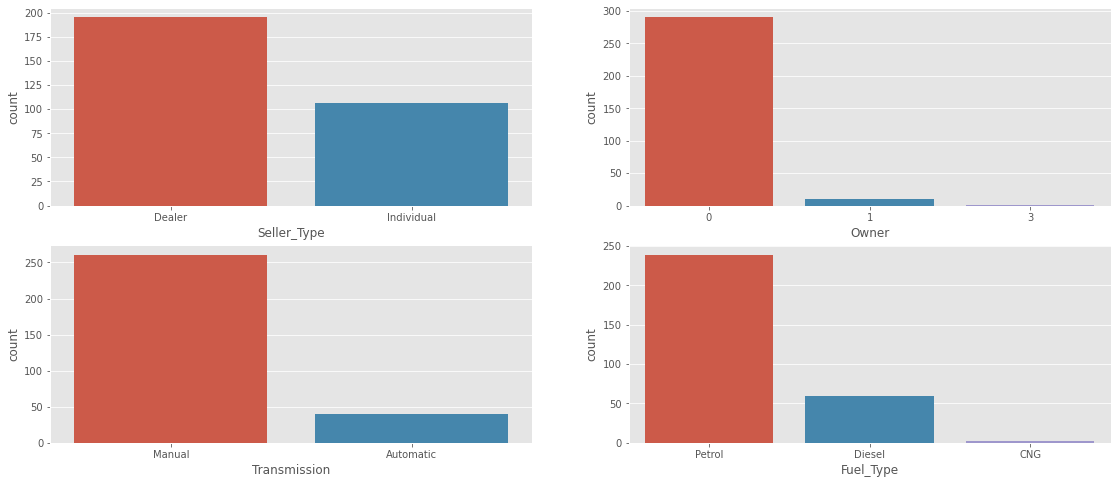

In [296]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.countplot(x='Transmission',data=df, ax=axes[1,0])
sns.countplot(x='Fuel_Type',data=df,ax=axes[1,1])
sns.countplot(x='Owner',data=df,ax=axes[0,1])
sns.countplot(x='Seller_Type',data=df,ax=axes[0,0])

In [297]:
# Creating Total Price Differece feature which tells total differance made between Showroom Price and Selling Price
df['Price_Diff']=df['Present_Price']-df['Selling_Price']

<AxesSubplot:xlabel='Seller_Type', ylabel='Price_Diff'>

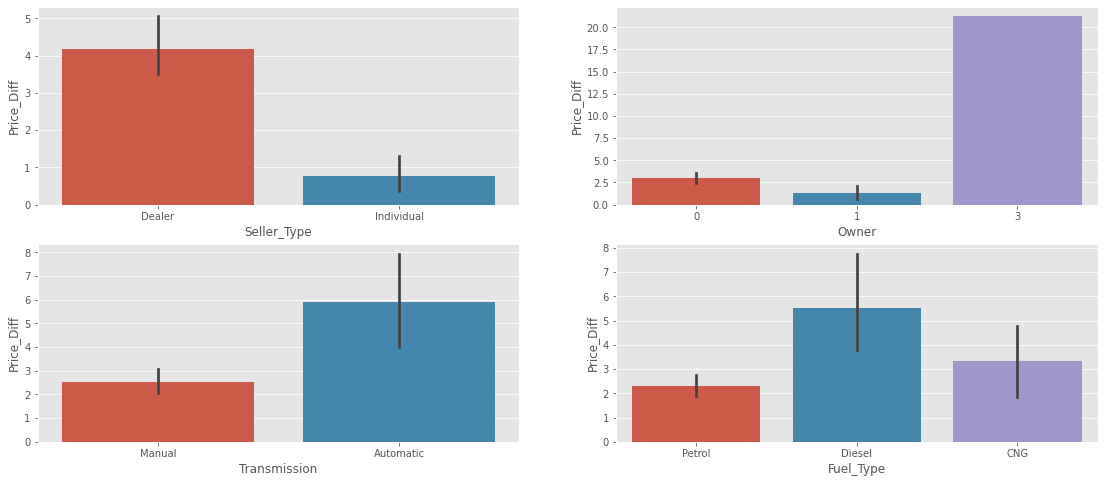

In [298]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.barplot(x='Transmission',y='Price_Diff',data=df,ax=axes[1,0])
sns.barplot(x='Fuel_Type',y='Price_Diff',data=df,ax=axes[1,1])
sns.barplot(x='Owner',y='Price_Diff',data=df,ax=axes[0,1])
sns.barplot(x='Seller_Type',y='Price_Diff',data=df,ax=axes[0,0])

In [299]:
df['Year']=2019-df['Year']


<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

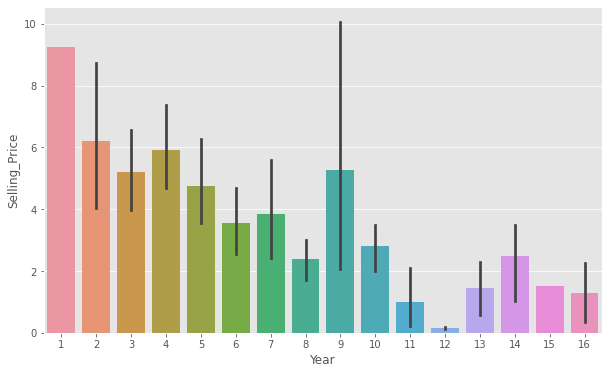

In [300]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Selling_Price',data=df)

In [301]:
px.scatter(x='Price_Diff',y='Kms_Driven',data_frame=df)

In [302]:
df[df['Kms_Driven']>=100000]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
37,800,16,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
50,fortuner,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
53,fortuner,6,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
77,corolla,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0,10.85
84,innova,14,3.49,13.46,197176,Diesel,Dealer,Manual,0,9.97
85,camry,13,2.50,23.73,142000,Petrol,Individual,Automatic,3,21.23
179,Honda Karizma,9,0.31,1.05,213000,Petrol,Individual,Manual,0,0.74
196,Activa 3g,11,0.17,0.52,500000,Petrol,Individual,Automatic,0,0.35


In [303]:
df[df['Kms_Driven']==78000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
62,fortuner,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
86,land cruiser,9,35.00,92.60,78000,Diesel,Dealer,Manual,0,57.60


In [304]:
df[df['Kms_Driven']==500000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
196,Activa 3g,11,0.17,0.52,500000,Petrol,Individual,Automatic,0,0.35


In [305]:
df.drop([86,196],axis=0,inplace=True)
px.scatter(x='Price_Diff',y='Kms_Driven',data_frame=df)

In [306]:
fuel_dummies =pd.get_dummies(df[['Fuel_Type','Transmission','Seller_Type']], drop_first=True)

In [307]:
df  = pd.concat([df,fuel_dummies],axis = 1)

In [308]:
df.drop(['Car_Name','Fuel_Type','Transmission','Seller_Type','Price_Diff'],axis=1,inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,5,3.35,5.59,27000,0,0,1,1,0
1,6,4.75,9.54,43000,0,1,0,1,0
2,2,7.25,9.85,6900,0,0,1,1,0
3,8,2.85,4.15,5200,0,0,1,1,0
4,5,4.60,6.87,42450,0,1,0,1,0


In [309]:
cv=5
r2=[]
cv_score=[]
mae=[]
mse=[]

In [310]:
X=df.drop('Selling_Price',axis=1)

In [311]:
y=df['Selling_Price'] 

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=34)

In [313]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((209, 8), (209,), (90, 8), (90,))

In [314]:
def results(model,X_train,X_test,y_train,y_test): 
    model.fit(X_train,y_train)
    predicts=model.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,model.predict(X_test))
    mean_sqare_E =mean_squared_error(y_test,model.predict(X_test))
    mean_abso_E =mean_absolute_error(y_test,model.predict(X_test))
    cv_mean = -cross_val_score(model,X_train,y_train,cv=cv, scoring='neg_mean_squared_error').mean()
    
    # Appending results to Lists 
    r2.append(r2_score(y_test,model.predict(X_test)))
    cv_score.append(-cross_val_score(model,X,y,cv=cv, scoring='neg_mean_squared_error').mean())
    mse.append(mean_squared_error(y_test,predicts))
    mae.append(mean_absolute_error(y_test,predicts))
    
    # Printing results  
    print(model,"\n") 
    print("r^2 value :",R_2,"\n")
    print('mean square error',mean_sqare_E,"\n")
    print('mean absolute error',mean_abso_E,"\n")
    print("CV score:",cv_mean,"\n")
    print('#'*40)
    # Plot for prediction vs originals
    plt.style.use('ggplot')
    test_index=y_test.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(16,8),linewidth=2,color="r",marker='o')
    ax=prediction[0].plot(label = "predictions",figsize=(16,8),linewidth=2,color="b",marker='*')
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r^2 value : 0.8838199743642776 

mean square error 4.612197803858588 

mean absolute error 1.3735638590645916 

CV score: 2.436554622312877 

########################################


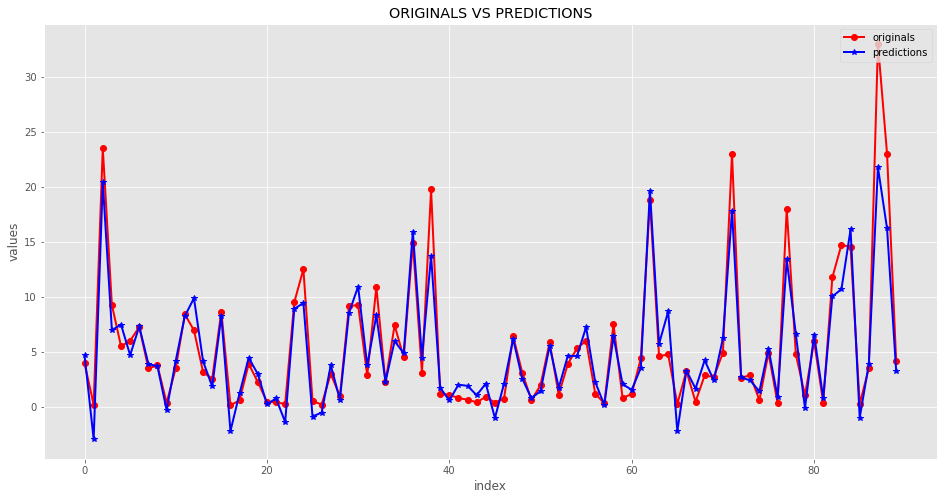

In [315]:
lg = LinearRegression()
results(lg,X_train,X_test,y_train,y_test)

RandomForestRegressor() 

r^2 value : 0.9254345833930855 

mean square error 2.960151272444445 

mean absolute error 0.7845288888888894 

CV score: 1.0564477636178855 

########################################


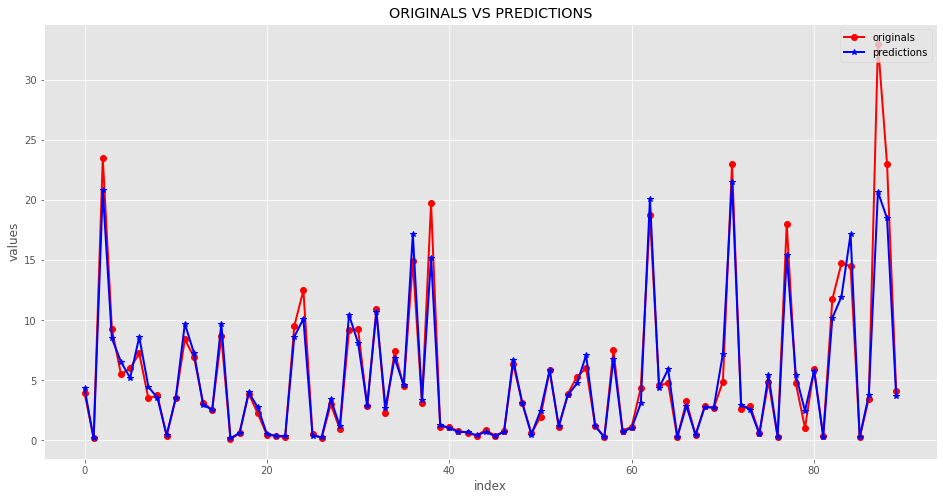

In [316]:
rfr = RandomForestRegressor()
results(rfr,X_train,X_test,y_train,y_test)

DecisionTreeRegressor() 

r^2 value : 0.9233352752097569 

mean square error 3.043491111111111 

mean absolute error 0.8022222222222223 

CV score: 1.87101 

########################################


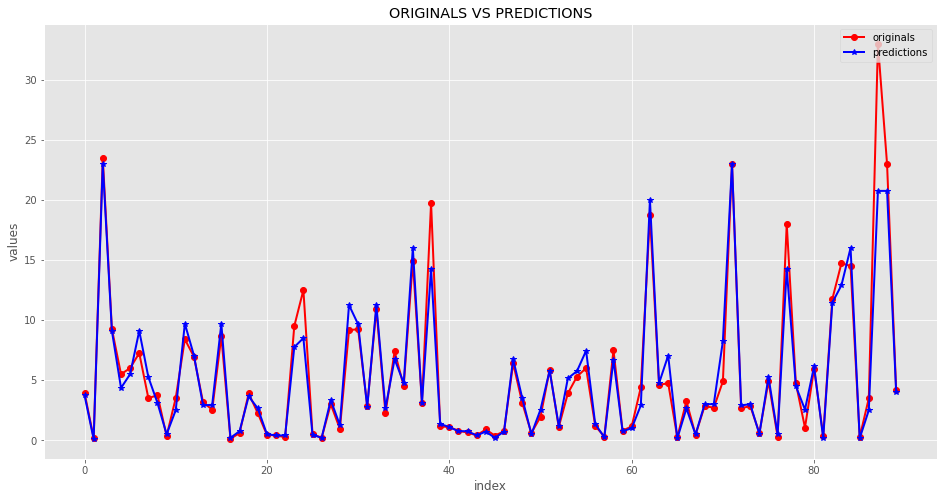

In [317]:
dtr =DecisionTreeRegressor()
results(dtr,X_train,X_test,y_train,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

r^2 value : 0.953481219525103 

mean square error 1.8467358392330213 

mean absolute error 0.5975827101998858 

CV score: 1.0142337707307145 

########################################


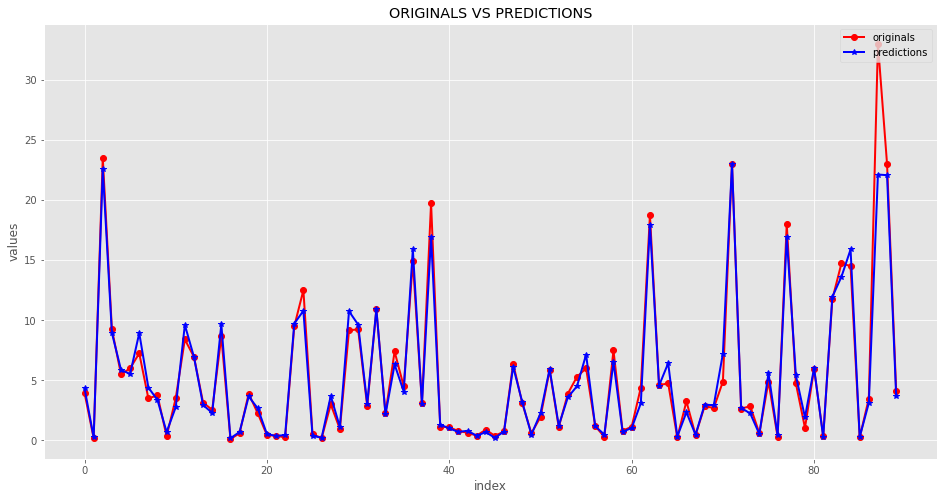

In [318]:
xgb_r = xg.XGBRegressor()
results(xgb_r,X_train,X_test,y_train,y_test)

In [319]:
params = {"alpha": [.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,30]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True)

In [320]:
clf.best_params_

{'alpha': 5}

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True) 

r^2 value : 0.8846251720339973 

mean square error 4.580232490512922 

mean absolute error 1.3682979599878036 

CV score: 2.4524572826003164 

########################################


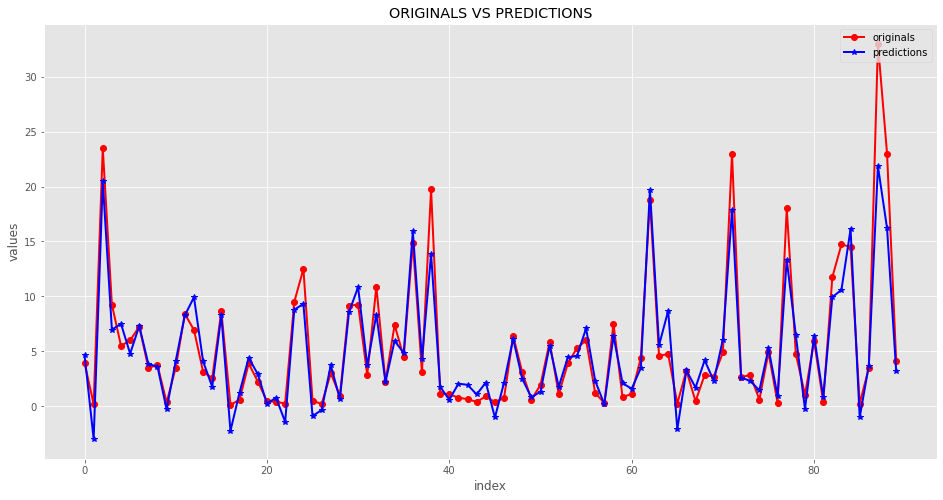

In [321]:
results(clf,X_train,X_test,y_train,y_test)

In [322]:
params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
lasreg = Lasso()
clf = GridSearchCV(estimator=lasreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True)

In [323]:
clf.best_params_

{'alpha': 1e-05}

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True) 

r^2 value : 0.8838224809903401 

mean square error 4.612098294023251 

mean absolute error 1.3735501198020612 

CV score: 2.4298695361704743 

########################################


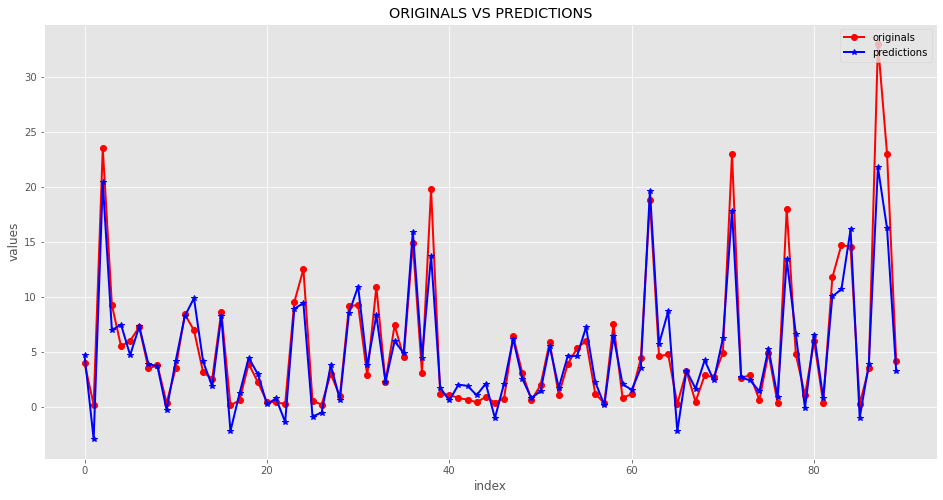

In [324]:
results(clf,X_train,X_test,y_train,y_test)

In [325]:
Results = pd.DataFrame({
    'Model':['linear','random Forest','Dicision Tree','XGBRegressor','Ridge','Lasso'],
    'r^2':r2,
    'cv_score':cv_score,
    'mae':mae,
    'mse':mse
})

In [326]:
Results

,Model,r^2,cv_score,mae,mse
0,linear,0.883820,3.747733,1.373564,4.612198
1,random Forest,0.925435,2.560953,0.784529,2.960151
2,Dicision Tree,0.923335,3.874734,0.802222,3.043491
3,XGBRegressor,0.953481,3.094240,0.597583,1.846736
4,Ridge,0.884625,3.610160,1.368298,4.580232
5,Lasso,0.883822,3.957253,1.373550,4.612098
